In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

from HodoUtils import HodoSummarySet

![hodo](./media/hodo_layout.png)

In [4]:
hss = HodoSummarySet()
hss.load_summary_file('./data/31854/ftHodo_OverviewFile_0_04-05-2018_09.13.25_AM.txt', 31854)
hss.load_summary_file('./data/31869/ftHodo_OverviewFile_0_04-05-2018_02.16.52_AM.txt', 31869)
hss.load_summary_file('./data/31878/ftHodo_OverviewFile_0_04-05-2018_03.19.25_AM.txt', 31878)
hss.load_summary_file('./data/31886/ftHodo_OverviewFile_0_04-04-2018_09.59.09_AM.txt', 31886)

In [5]:
hss.runs

[31854, 31869, 31878, 31886]

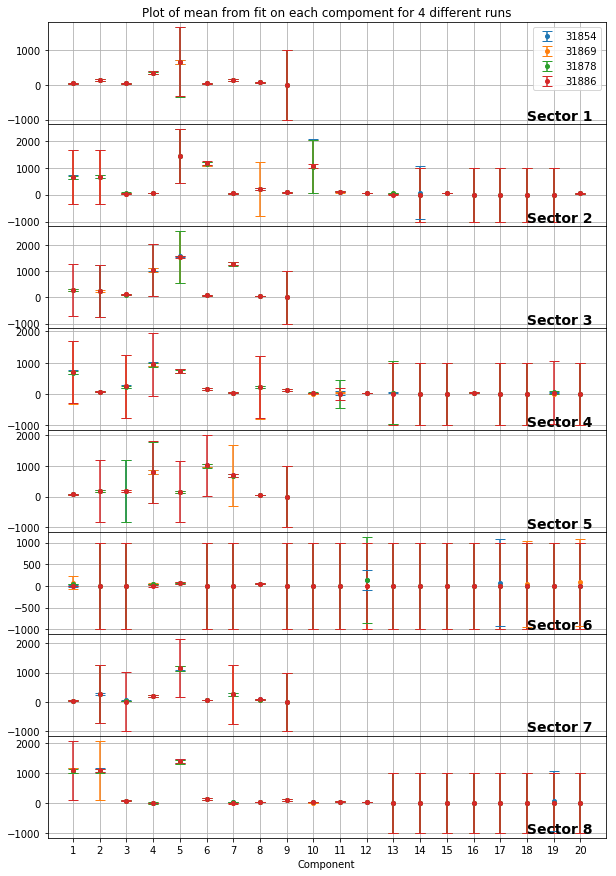

In [6]:
fig, axes = plt.subplots(8, 1, figsize=(10, 15), sharex=True)
options = dict(marker='.', linestyle='None', ms=8, mew=1, capsize=5)

for sector in hss.sectors:
    ax = axes[sector-1]
    for i, run in enumerate(hss.runs):
        x, y, err = hss.get_sector_data(run, sector, 1, "m_mips_maxV")
        ax.errorbar(x, y, yerr=err, label=str(run), **options)
    ax.grid()
    ax.text(0.85, 0.15, 
            ' Sector {}'.format(sector), 
            transform=ax.transAxes, 
            fontsize=14, 
            weight='bold',
            verticalalignment='top')
    
axes[0].legend(loc=1)
axes[0].set_title('Plot of mean from fit on each compoment for 4 different runs')
axes[-1].set_xlabel('Component')
plt.xticks(range(1, 21))
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

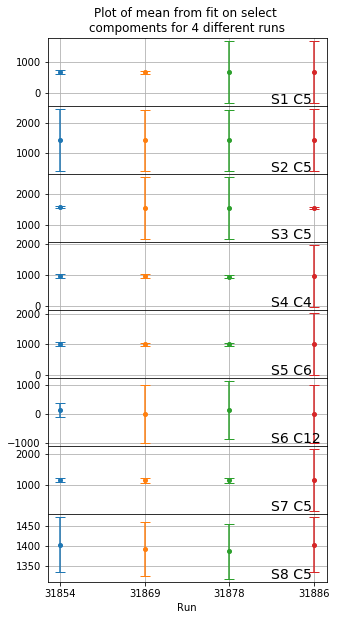

In [7]:
# values of interest 
idx = [(1, 5), (2, 5), (3, 5), (4, 4), (5, 6), (6, 12), (7, 5), (8, 5)] # [(sector, component), ...]

fig, axes = plt.subplots(8, 1, figsize=(5, 10), sharex=True)
options = dict(marker='.', linestyle='None', ms=8, mew=1, capsize=5)
for i, sc in enumerate(idx):
    s, c = sc
    ax = axes[i]
    for x, run in enumerate(hss.runs):
        _, y, err = hss.get_sector_data(run, s, 1, "m_mips_maxV")
        ax.errorbar(x, y[c-1], err[c-1], label=str(run), **options)
    ax.grid()
    ax.text(0.8, 0.2, 
        'S{} C{}'.format(s, c), 
        transform=ax.transAxes, 
        fontsize=14, 
        verticalalignment='top')
    
#axes[0].legend(loc=1)
axes[0].set_title('Plot of mean from fit on select \ncompoments for 4 different runs')
axes[-1].set_xlabel('Run')
axes[-1].set_xticks(range(4))
axes[-1].set_xticklabels(map(str, hss.runs))
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

/home/adam/Envs/hodo/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in divide
  # Remove the CWD from sys.path while we load stuff.
/home/adam/Envs/hodo/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in divide
  # Remove the CWD from sys.path while we load stuff.


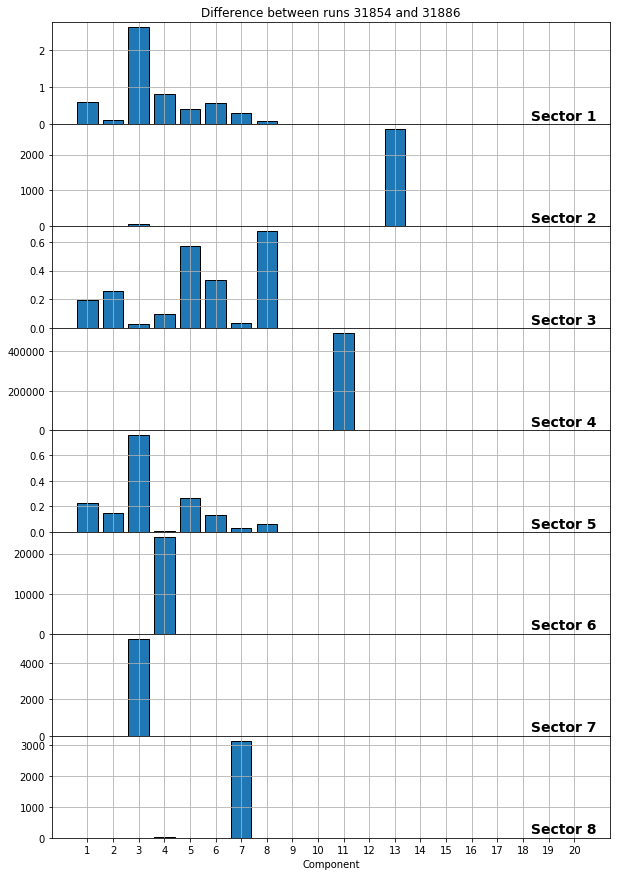

In [8]:
# plot to compare runs 31854 and 31886
fig, axes = plt.subplots(8, 1, figsize=(10, 15), sharex=True)

run1, run2 = 31854, 31886

for sector in hss.sectors:
    ax = axes[sector-1]
    x1, y1, err1 = hss.get_sector_data(run1, sector, 1, "m_mips_maxV")
    x2, y2, err2 = hss.get_sector_data(run2, sector, 1, "m_mips_maxV")
    ax.bar(x2, np.abs(y2-y1)/y2*100, label=str(run2), edgecolor='k')
    ax.grid()
    ax.text(0.85, 0.15, 
            ' Sector {}'.format(sector), 
            transform=ax.transAxes, 
            fontsize=14, 
            weight='bold',
            verticalalignment='top')

axes[0].set_title('Difference between runs 31854 and 31886')
axes[-1].set_xlabel('Component')
plt.xticks(range(1, 21))
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [9]:
# plot above shows some huge differences for a handful of components, let's check these
check = [(2,13), (4,11), (6,4), (7,3), (8,7)]

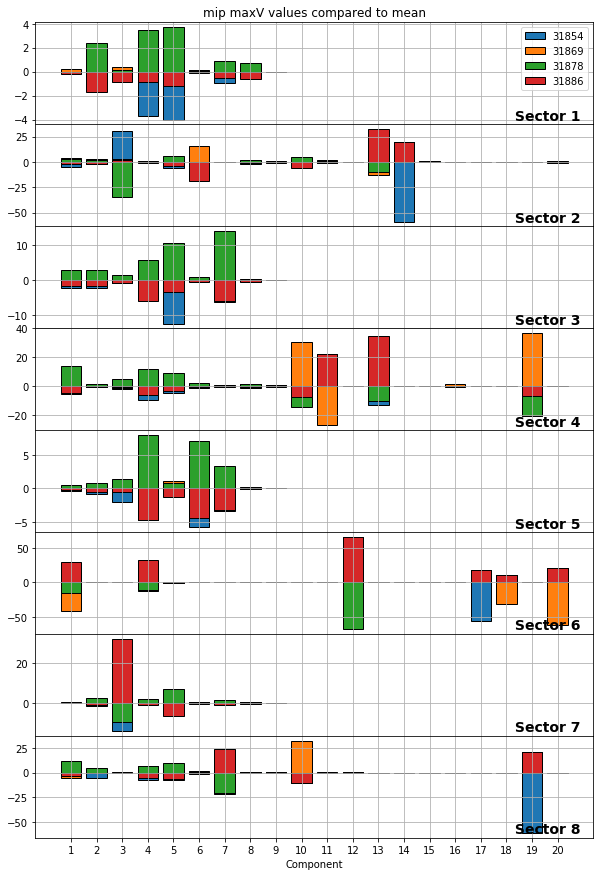

In [10]:
# plot the different from the mean for all components (layer 1)
# flat values for each run, and a mean to make a difference from

fig, axes = plt.subplots(8, 1, figsize=(10, 15), sharex=True)

for sector in hss.sectors:
    ax = axes[sector-1]
    df = hss.df[(hss.df['sector']==sector) & (hss.df['layer']==1)]
    y_mean = df.groupby('component')['m_mips_maxV'].mean().values
    for run in hss.runs:
        df_run = df[df['run_id']==run]
        x, y = df_run['component'].values, df_run['m_mips_maxV'].values
        ax.bar(x, y_mean-y, label=str(run), edgecolor='k') #marker='^', linestyle='None')
    ax.grid()
    ax.text(0.85, 0.15, 
        ' Sector {}'.format(sector), 
        transform=ax.transAxes, 
        fontsize=14, 
        weight='bold',
        verticalalignment='top')

axes[0].legend()
axes[0].set_title('mip maxV values compared to mean')
axes[-1].set_xlabel('Component')
plt.xticks(range(1, 21))
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

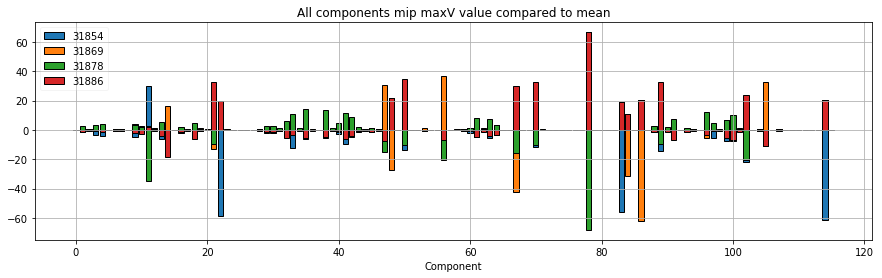

In [11]:
# plot the different from the mean for all components (layer 1)
# flat values for each run, and a mean to make a difference from

fig, ax = plt.subplots(1, 1, figsize=(15, 4), sharex=True)

df = hss.df[(hss.df['layer']==1)]
y_mean = df.groupby(['sector', 'component'])['m_mips_maxV'].mean().values
x = range(len(y_mean))
for run in hss.runs:
    y = df[df['run_id']==run]['m_mips_maxV'].values
    ax.bar(x, y_mean-y, label=str(run), edgecolor='k') #marker='^', linestyle='None')

ax.grid()
leg = ax.legend(loc=2)
leg.get_frame().set_alpha(0.2)
ax.set_title('All components mip maxV value compared to mean')
ax.set_xlabel('Component')
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

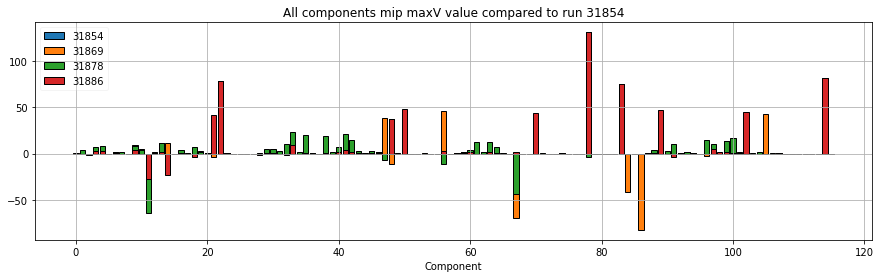

In [13]:
# plot the different from the first run with other for all components (layer 1)

fig, ax = plt.subplots(1, 1, figsize=(15, 4), sharex=True)

df = hss.df[(hss.df['layer']==1)]
y_ref = df[df['run_id']==hss.runs[0]]['m_mips_maxV'].values
x = range(len(y_ref))
for run in hss.runs:
    y = df[df['run_id']==run]['m_mips_maxV'].values
    ax.bar(x, y_ref-y, label=str(run), edgecolor='k') #marker='^', linestyle='None')

ax.grid()
leg = ax.legend(loc=2)
leg.get_frame().set_alpha(0.2)
ax.set_title('All components mip maxV value compared to run 31854')
ax.set_xlabel('Component')
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()